In [1]:
from shapely.geometry import Point, LineString, Polygon

In [2]:
point1 = Point(2.2, 4.2)

In [3]:
point2 = Point(7.2, -25.1)

In [4]:
point3 = Point(9.26, -2.456)

In [5]:
point3D = Point(9.26, -2.456, 0.57)

In [7]:
point_type = type(point1)

In [9]:
print(point1)

POINT (2.2 4.2)


In [11]:
print(point3D)

POINT Z (9.26 -2.456 0.57)


In [12]:
print(type(point1))

<class 'shapely.geometry.point.Point'>


In [13]:
point_coords = point1.coords

In [14]:
type(point_coords)

shapely.coords.CoordinateSequence

In [15]:
xy = point_coords.xy

In [16]:
x = point1.x

In [17]:
y = point1.y

In [18]:
print(xy)

(array('d', [2.2]), array('d', [4.2]))


In [19]:
print(x)

2.2


In [20]:
print(y)

4.2


In [21]:
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


In [22]:
import math

distance = math.acos(math.sin(math.radians(point1.y))*math.sin(math.radians(point2.y))+math.cos(math.radians(point1.y))*math.cos(math.radians(point2.y))*math.cos(math.radians(point2.x)-math.radians(point1.x)))*6378

print( "{0:8.4f} for equatorial radius in km".format(distance))

3306.1044 for equatorial radius in km


In [23]:
 distance = math.acos(math.sin(math.radians(point1.y))*math.sin(math.radians(point2.y))+math.cos(math.radians(point1.y))*math.cos(math.radians(point2.y))*math.cos(math.radians(point2.x)-math.radians(point1.x)))*6356
    
 print( "{0:8.4f} for polar radius in km".format(distance))   

3294.7004 for polar radius in km


In [24]:
import pyproj

geod = pyproj.Geod(ellps='WGS84')

angle1,angle2,distance = geod.inv(point1.x, point1.y, point2.x, point2.y)

print ("{0:8.4f} for ellipsoid WGS84 in km".format(distance/1000))

3286.3538 for ellipsoid WGS84 in km


In [25]:
line = LineString([point1, point2, point3])

line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [26]:
print(line)

print(line2)

type(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


shapely.geometry.linestring.LineString

In [27]:
lxy = line.xy

print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


In [28]:
line_x = lxy[0]

line_y = line.xy[1]

print(line_x)

print(line_y)

array('d', [2.2, 7.2, 9.26])
array('d', [4.2, -25.1, -2.456])


In [29]:
l_length = line.length
    
l_centroid = line.centroid

centroid_type = type(l_centroid)

print("Length of our line: {0:.2f}".format(l_length))

print("Centroid of our line: ", l_centroid)

print("Type of the centroid:", centroid_type)


Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


In [30]:
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

poly_type = poly.geom_type

poly_type2 = type(poly)

print(poly)

print(poly2)

print("Geometry type as text:", poly_type)

print("Geometry how Python shows it:", poly_type2)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
Geometry type as text: Polygon
Geometry how Python shows it: <class 'shapely.geometry.polygon.Polygon'>


In [31]:
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

world = Polygon(shell=world_exterior)

world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

print(world)

print(world_has_a_hole)

type(world_has_a_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


shapely.geometry.polygon.Polygon

In [32]:
world_centroid = world.centroid

world_area = world.area

world_bbox = world.bounds

world_ext = world.exterior

world_ext_length = world_ext.length

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


(-180.0, -90.0, 180.0, 90.0)

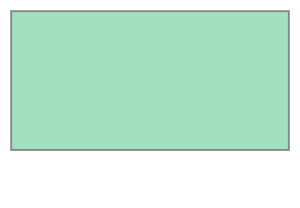

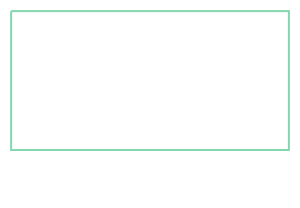

In [35]:
print("Poly centroid: ", world_centroid)

print("Poly Area: ", world_area)

print("Poly Bounding Box: ", world_bbox)

print("Poly Exterior: ", world_ext)

print("Poly Exterior Length: ", world_ext_length)

display(world_bbox)
display(world)
display(world_ext)

In [37]:
import pandas as pd

df = pd.read_csv('C:/Users/sandera/geopython/L1/global-city-population-estimates.csv', sep=';', encoding='latin1')

pd.set_option('max_columns',20)

print(df.head(5))

  Country or area Urban Agglomeration   Latitude   Longitude  Population_2015  \
0           Japan               Tokyo  35.689500  139.691710         38001018   
1           India               Delhi  28.666670   77.216670         25703168   
2           China            Shanghai  31.220000  121.460000         23740778   
3          Brazil           S?o Paulo -23.550000  -46.640000         21066245   
4           India     Mumbai (Bombay)  19.073975   72.880838         21042538   

   Unnamed: 5  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [45]:
def make_point(row):
    return Point( row['Longitude'], row['Latitude'] )

df['points'] = df.apply(make_point, axis=1)
print(df.head(5))

  Country or area Urban Agglomeration   Latitude   Longitude  Population_2015  \
0           Japan               Tokyo  35.689500  139.691710         38001018   
1           India               Delhi  28.666670   77.216670         25703168   
2           China            Shanghai  31.220000  121.460000         23740778   
3          Brazil           S?o Paulo -23.550000  -46.640000         21066245   
4           India     Mumbai (Bombay)  19.073975   72.880838         21042538   

   Unnamed: 5                              points  
0         NaN           POINT (139.69171 35.6895)  
1         NaN  POINT (77.21666999999999 28.66667)  
2         NaN                POINT (121.46 31.22)  
3         NaN               POINT (-46.64 -23.55)  
4         NaN         POINT (72.880838 19.073975)  


In [47]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

multi_point = MultiPoint([point1, point2, point3])

multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

line1 = LineString([point1, point2])

line2 = LineString([point2, point3])

multi_line = MultiLineString([line1, line2])

west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

west_poly = Polygon(shell=west_exterior, holes=west_hole)

min_x, min_y = 0, -90

max_x, max_y = 180, 90

east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

multi_poly = MultiPolygon([west_poly, east_poly_box])

In [48]:
print("MultiPoint:", multi_point)

print("MultiLine: ", multi_line)

print("Bounding box: ", east_poly_box)

print("MultiPoly: ", multi_poly)

MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))
